# Thresholding

When performing logical operations of the type ```image > value``` we have seen that this allowed us to perform **thresholding**, one the basic image processing methods to identify objects in an image. Here we come back to this topic and show how we can automated the threshold selection, combine masks etc.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from microfilm.microplot import microshow

Here we use a simple image of plants to illustrate thresholding. The image is composed of RGB channels and we will work on the green channel:

In [3]:
image_RGB = skimage.io.imread('../data/IMG_6499.jpg')
image_green = image_RGB[:,:,1]

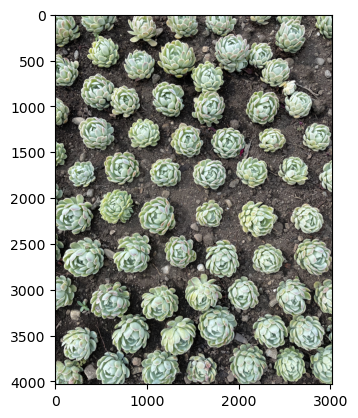

In [64]:
plt.imshow(image_stack);

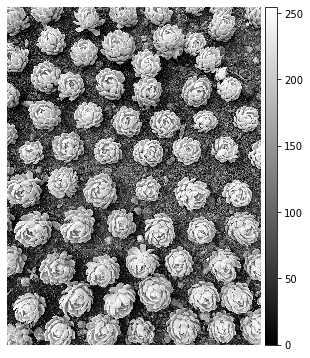

In [66]:
microshow(image_green, fig_scaling=5, show_colorbar=True);

## Manual investigation

If we want to identify plants we need to create "blobs" of connected pixels. As the plants are bright objects we can try to set a threshold by looking at a histogram of pixel values:

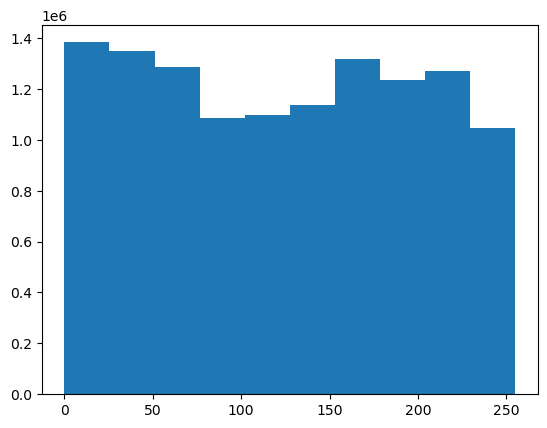

In [67]:
plt.hist(np.ravel(image_green));

We sort of see two pixel distributions for background and plants, with a limit around 100. We can create a mask using that value:

In [68]:
mask = image_green > 100

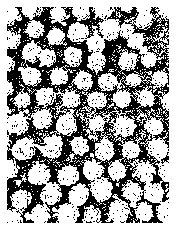

In [69]:
microshow(mask);

For the sake of the experiment, let's use a higher threshold:

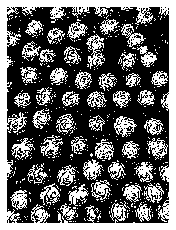

In [70]:
mask = image_green > 180
microshow(mask);

At low thresholds, a lot of background is included in the masks while at high threshold, objects are broken. This is a typical issue and we'll see ways to fix this problem.

## Automatic thresholding

Setting a threshold manually is not ideal for two reasons: 
1. your eyes might fool you
2. if you have to do this operation on 100s of images you don't want to do it by hand.

Several methods have been developed to detect an "ideal" threshold based on the pixel histogram. One of the most famous ones is the Otsu method: it sets a threshold by dividing the pixels in two classes and tries to minimize the variance of both classes.

Such classical algorithms are all implemented in scikit-image and we can just use them out of the box. All algorithm are grouped in logical groups (filtering, measuring etc.) Often the easiest is just to use Google to find them.

For example the [Otsu algorithm](https://www.google.com/search?q=skimage+otsu&oq=skimage+otsu&aqs=chrome..69i57j69i60j0l4.2268j0j7&sourceid=chrome&ie=UTF-8):

In [71]:
import skimage.filters

help(skimage.filters.threshold_otsu)

Help on function threshold_otsu in module skimage.filters.thresholding:

threshold_otsu(image=None, nbins=256, *, hist=None)
    Return threshold value based on Otsu's method.
    
    Either image or hist must be provided. If hist is provided, the actual
    histogram of the image is ignored.
    
    Parameters
    ----------
    image : (N, M[, ..., P]) ndarray, optional
        Grayscale input image.
    nbins : int, optional
        Number of bins used to calculate histogram. This value is ignored for
        integer arrays.
    hist : array, or 2-tuple of arrays, optional
        Histogram from which to determine the threshold, and optionally a
        corresponding array of bin center intensities. If no hist provided,
        this function will compute it from the image.
    
    
    Returns
    -------
    threshold : float
        Upper threshold value. All pixels with an intensity higher than
        this value are assumed to be foreground.
    
    References
    ----------

In [72]:
my_otsu_threshold = skimage.filters.threshold_otsu(image_green)
print(my_otsu_threshold)

122


Using that value we can create a new mask:

In [73]:
mask_green = image_green > my_otsu_threshold

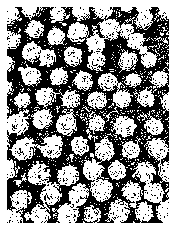

In [74]:
microshow(mask_green);

## Choosing a method

It can be difficult to tell in advance which thresholding method will work best for a given method. Just like in Fiji, you can quickly check all methods and pick the one that visually seems to work best:

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


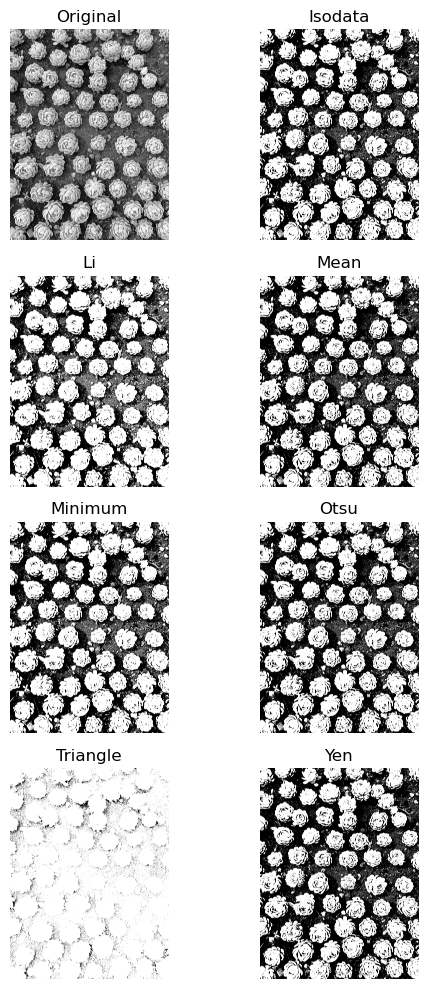

In [75]:
skimage.filters.try_all_threshold(image_green, figsize=(6,10));

## Exercise

1. Use the remote sensing (image of a region of earth in a given wavelength) at ```landsat_collect/LC080340322016070701T1-SC20180214145604/crop/LC08_L1TP_034032_20160707_20170221_01_T1_sr_band4_crop.tif```. The image displays a bright cloud to be masked.
2. Plot a histogram of pixel values and estimate a threshold.
3. Compute a threshold using the Li method. Were you close ?
4. Compute mask using the automated threshold and plot it.